In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az

# HW8

## Q1

In [2]:
d = 200

In [3]:
data1 = pd.read_csv("data/diabetes.csv")
n1, p1 = data1.shape[0], data1.shape[1] - 1
X1, y1 = np.column_stack([np.ones(n1), data1.iloc[:, :p1].values]), data1.iloc[:, p1].values

with pm.Model() as GLM:
    betas = pm.Normal("betas", mu=0, sigma=1, shape=p1+1)
    y = pm.Bernoulli("y", p=1/(1+pm.math.exp(-X1@betas)), observed=y1)
    idata1 = pm.sample(draws=d, chains=2, tune=50)

az.summary(idata1, round_to=3)

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [betas]


Sampling 2 chains for 50 tune and 200 draw iterations (100 + 400 draws total) took 13 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],-3.115,2.840,-6.462,-0.298,1.956,0.051,2.974,25.905,1.915
betas[1],-0.080,0.194,-0.273,0.150,0.134,0.001,2.678,35.552,2.192
betas[2],-0.265,0.294,-0.561,0.033,0.204,0.000,2.619,10.778,2.231
betas[3],0.019,0.037,-0.023,0.056,0.025,0.000,2.676,27.777,2.184
betas[4],0.196,0.195,-0.007,0.391,0.135,0.000,2.668,39.614,2.181
betas[5],0.037,0.037,-0.001,0.076,0.026,0.000,2.620,11.376,2.233
betas[6],0.535,0.476,0.044,1.011,0.330,0.001,2.938,21.127,1.918
betas[7],0.796,0.190,0.285,1.018,0.055,0.053,19.354,61.754,1.847
betas[8],-0.288,0.296,-0.584,0.019,0.205,0.000,3.011,14.959,1.827


array([[<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>]], dtype=object)

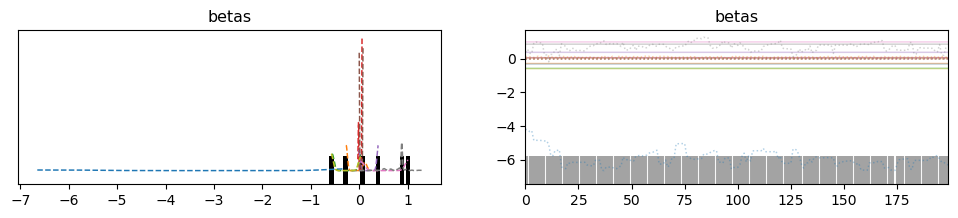

In [4]:
az.plot_trace(idata1, combined=True)

## Q2

In [5]:
data2 = pd.read_csv("data/fire.csv")
m2 = 4
n2, p2 = data2.shape[0], data2.shape[1] - m2
X2, y2 = np.column_stack([np.ones(n2), data2.iloc[:, :p2].values]), data2.iloc[:, p2:].values

with pm.Model() as MVN1:
    packed_L1 = pm.LKJCholeskyCov("packed_L", n=m2, eta=2,
                                 sd_dist=pm.Exponential.dist(1, shape=m2), compute_corr=False)
    L1 = pm.expand_packed_triangular(m2, packed_L1)
    betas2 = pm.Normal('betas', mu=0, sigma=1, shape=(p2+1, m2))
    y2 = pm.MvNormal('y', mu=X2@betas2, chol=L1, observed=y2)
    idata2 = pm.sample(draws=d, chains=2, tune=50)

az.summary(idata2, round_to=3)

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [packed_L, betas]


/opt/conda/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
/opt/conda/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
Sampling 2 chains for 50 tune and 200 draw iterations (100 + 400 draws total) took 394 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",5.831,1.089,3.929,7.701,0.084,0.091,179.840,220.407,1.006
"betas[0, 1]",-0.161,0.922,-1.943,1.561,0.076,0.065,156.705,118.602,1.021
"betas[0, 2]",0.508,0.995,-1.267,2.295,0.075,0.050,181.355,239.239,1.014
"betas[0, 3]",-2.519,0.929,-4.353,-0.934,0.058,0.043,260.257,258.843,1.003
"betas[1, 0]",2.409,0.067,2.284,2.528,0.005,0.003,168.492,275.027,1.018
"betas[1, 1]",3.654,0.346,2.981,4.272,0.153,0.046,4.887,30.924,1.333
"betas[1, 2]",14.751,1.043,13.381,15.950,0.093,0.361,102.138,169.775,1.032
"betas[1, 3]",0.404,0.032,0.342,0.459,0.002,0.001,262.676,244.369,1.006
"betas[2, 0]",0.587,0.026,0.543,0.634,0.001,0.001,335.781,228.572,1.000
"betas[2, 1]",0.986,0.117,0.783,1.216,0.042,0.013,7.792,27.009,1.183


array([[<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'packed_L'}>,
        <Axes: title={'center': 'packed_L'}>]], dtype=object)

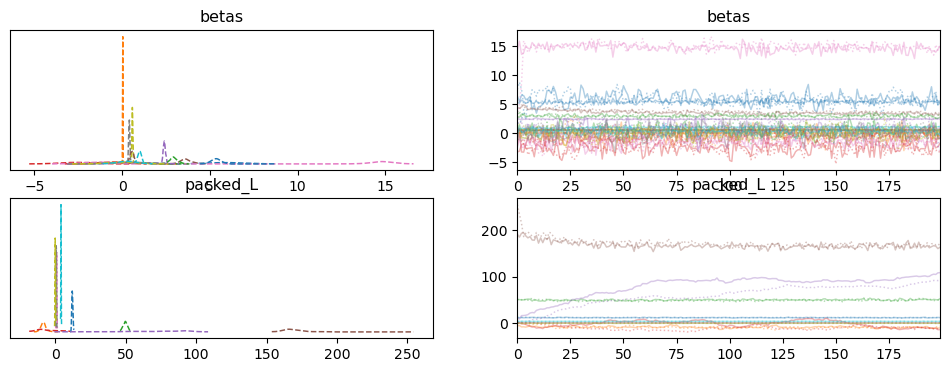

In [6]:
az.plot_trace(idata2, combined=True)

In [7]:
data3 = data2.iloc[:200, :]
m3 = 4
n3, p3 = data3.shape[0], data3.shape[1] - m3
X3, y3 = np.column_stack([np.ones(n3), data3.iloc[:, :p3].values]), data3.iloc[:, p3:].values

with pm.Model() as MVN2:
    packed_L2 = pm.LKJCholeskyCov("packed_L", n=m3, eta=2,
                                 sd_dist=pm.Exponential.dist(1, shape=m3), compute_corr=False)
    L2 = pm.expand_packed_triangular(m3, packed_L2)
    betas3 = pm.Normal('betas', mu=0, sigma=1, shape=(p3+1, m3))
    y3 = pm.MvNormal('y', mu=X3@betas3, chol=L2, observed=y3)
    idata3 = pm.sample(draws=d, chains=2, tune=50)

az.summary(idata3, round_to=3)

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [packed_L, betas]


/opt/conda/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
Sampling 2 chains for 50 tune and 200 draw iterations (100 + 400 draws total) took 349 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",2.136,0.906,0.579,3.875,0.041,0.041,484.294,162.730,1.013
"betas[0, 1]",-0.061,0.927,-1.675,1.669,0.051,0.046,332.200,170.510,1.005
"betas[0, 2]",0.327,0.908,-1.392,1.852,0.036,0.032,623.057,367.121,0.999
"betas[0, 3]",-0.679,0.984,-2.494,1.193,0.057,0.049,306.757,248.673,1.005
"betas[1, 0]",2.869,0.124,2.647,3.104,0.047,0.015,7.252,26.806,1.199
"betas[1, 1]",2.777,0.431,2.153,3.725,0.140,0.078,10.078,33.570,1.141
"betas[1, 2]",10.653,0.900,9.017,12.328,0.059,0.046,227.468,283.820,1.011
"betas[1, 3]",0.325,0.060,0.217,0.437,0.004,0.003,244.154,216.345,1.006
"betas[2, 0]",0.667,0.037,0.597,0.731,0.007,0.001,30.280,266.120,1.062
"betas[2, 1]",0.759,0.136,0.516,1.030,0.034,0.015,16.487,37.448,1.083


array([[<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'packed_L'}>,
        <Axes: title={'center': 'packed_L'}>]], dtype=object)

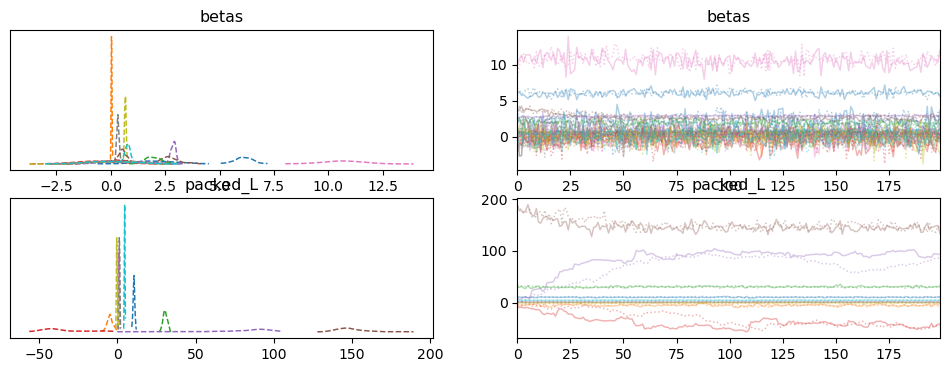

In [8]:
az.plot_trace(idata3, combined=True)

In [9]:
data4 = data2.iloc[:, 2:]
m4 = 4
n4, p4 = data4.shape[0], data4.shape[1] - m4
X4, y4 = np.column_stack([np.ones(n4), data4.iloc[:, :p4].values]), data4.iloc[:, p4:].values

with pm.Model() as MVN3:
    packed_L3 = pm.LKJCholeskyCov("packed_L", n=m4, eta=2,
                                 sd_dist=pm.Exponential.dist(1, shape=m4), compute_corr=False)
    L3 = pm.expand_packed_triangular(m4, packed_L3)
    betas4 = pm.Normal('betas', mu=0, sigma=1, shape=(p4+1, m4))
    y4 = pm.MvNormal('y', mu=X4@betas4, chol=L3, observed=y4)
    idata4 = pm.sample(draws=d, chains=2, tune=50)

az.summary(idata4, round_to=3)

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [packed_L, betas]


/opt/conda/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
Sampling 2 chains for 50 tune and 200 draw iterations (100 + 400 draws total) took 201 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",8.045,1.008,6.471,9.967,0.056,0.057,321.791,127.285,1.017
"betas[0, 1]",0.618,1.078,-1.423,2.554,0.100,0.059,125.481,138.826,1.015
"betas[0, 2]",1.070,1.065,-0.876,2.980,0.074,0.059,205.509,308.613,1.014
"betas[0, 3]",-2.197,0.965,-3.935,-0.460,0.036,0.056,700.667,218.515,1.000
"betas[1, 0]",9.263,1.151,7.850,12.073,0.381,0.395,14.806,25.096,1.093
"betas[1, 1]",3.419,2.119,1.113,8.607,0.691,0.756,13.559,25.115,1.108
"betas[1, 2]",5.283,1.235,3.121,7.722,0.255,0.138,27.681,61.501,1.060
"betas[1, 3]",1.243,0.192,0.923,1.627,0.048,0.038,22.410,26.371,1.063
"betas[2, 0]",-0.301,0.986,-1.929,1.691,0.038,0.052,651.325,310.999,1.001
"betas[2, 1]",0.205,0.997,-1.892,1.924,0.049,0.057,419.117,218.323,1.006


array([[<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'packed_L'}>,
        <Axes: title={'center': 'packed_L'}>]], dtype=object)

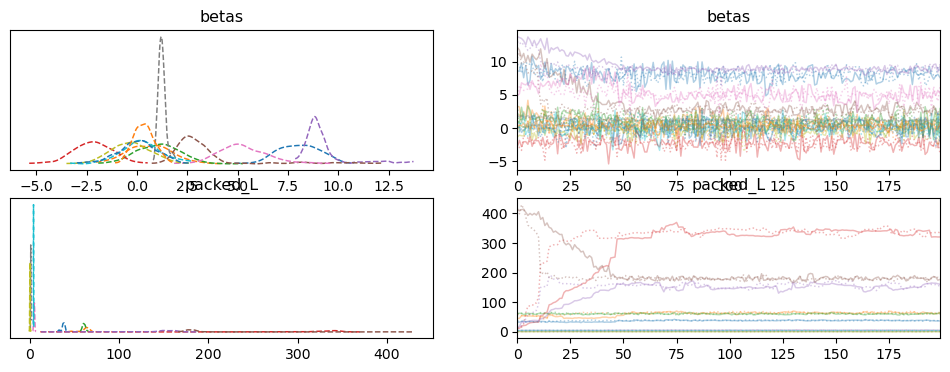

In [10]:
az.plot_trace(idata4, combined=True)

In [11]:
data5 = data2.iloc[:, :7]
m5 = 2
n5, p5 = data5.shape[0], data5.shape[1] - m5
X5, y5 = np.column_stack([np.ones(n5), data5.iloc[:, :p5].values]), data5.iloc[:, p5:].values

with pm.Model() as MVN4:
    packed_L4 = pm.LKJCholeskyCov("packed_L", n=m5, eta=2,
                                 sd_dist=pm.Exponential.dist(1, shape=m5), compute_corr=False)
    L4 = pm.expand_packed_triangular(m5, packed_L4)
    betas5 = pm.Normal('betas', mu=0, sigma=1, shape=(p5+1, m5))
    y5 = pm.MvNormal('y', mu=X5@betas5, chol=L4, observed=y5)
    idata5 = pm.sample(draws=d, chains=2, tune=50)

az.summary(idata5, round_to=3)

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [packed_L, betas]


/opt/conda/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
Sampling 2 chains for 50 tune and 200 draw iterations (100 + 400 draws total) took 96 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",-0.179,0.957,-1.783,1.726,0.048,0.057,418.935,250.551,1.003
"betas[0, 1]",-0.038,0.981,-1.788,1.758,0.055,0.054,316.613,210.779,1.004
"betas[1, 0]",3.615,0.407,2.852,4.327,0.020,0.019,427.550,308.280,1.006
"betas[1, 1]",6.370,0.853,4.819,7.935,0.040,0.037,455.395,243.193,1.002
"betas[2, 0]",0.800,0.137,0.544,1.073,0.006,0.006,496.292,367.409,1.003
"betas[2, 1]",0.819,0.498,-0.051,1.706,0.021,0.027,532.448,253.558,0.999
"betas[3, 0]",0.240,0.733,-1.111,1.572,0.031,0.034,566.291,333.681,1.002
"betas[3, 1]",-1.004,0.900,-2.549,0.708,0.041,0.043,469.952,262.999,1.000
"betas[4, 0]",0.112,0.942,-1.721,1.807,0.047,0.043,395.462,332.748,1.005
"betas[4, 1]",0.025,0.989,-1.710,1.926,0.052,0.047,357.072,308.564,1.001


array([[<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'packed_L'}>,
        <Axes: title={'center': 'packed_L'}>]], dtype=object)

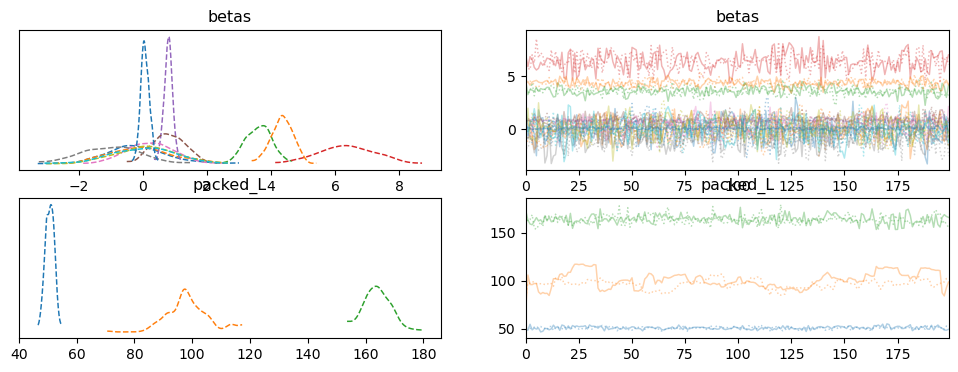

In [12]:
az.plot_trace(idata5, combined=True)

Inceasing `n` would increase the precision of the model; increasing `p` would also increase the precision of the model, but might introduce overfitting; increasing `m` would increase the complexity of the model.

## Q3

In [13]:
data6 = pd.read_csv("data/flower.csv")
m6 = 2
n6, p6 = data6.shape[0], data6.shape[1] - m6
X6, y6 = np.column_stack([np.ones(n6), data6.iloc[:, :p6].values]), data6.iloc[:, p6:].values

with pm.Model() as MVN5:
    betas6 = pm.Normal('betas', mu=0, sigma=1, shape=(p6+1, m6))
    y6 = pm.Bernoulli('y', p=pm.math.invprobit(X6@betas6), observed=y6)
    idata6 = pm.sample(draws=d, chains=2, tune=50)

az.summary(idata6, round_to=3)

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [betas]


Sampling 2 chains for 50 tune and 200 draw iterations (100 + 400 draws total) took 6 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",0.315,0.851,-1.167,1.971,0.058,0.043,209.326,149.306,1.000
"betas[0, 1]",1.382,0.834,0.169,3.221,0.046,0.045,320.185,333.586,1.014
"betas[1, 0]",0.329,0.543,-0.684,1.272,0.035,0.024,242.870,247.575,1.008
"betas[1, 1]",0.233,0.303,-0.439,0.720,0.015,0.013,397.753,308.564,1.000
"betas[2, 0]",1.208,0.686,0.032,2.565,0.046,0.033,222.616,247.386,1.003
"betas[2, 1]",-1.232,0.345,-1.800,-0.569,0.014,0.013,606.946,408.391,0.998
"betas[3, 0]",-1.912,0.680,-3.115,-0.574,0.045,0.048,263.149,117.557,1.001
"betas[3, 1]",0.495,0.284,-0.095,0.975,0.015,0.014,346.786,289.822,1.003
"betas[4, 0]",-0.768,0.918,-2.561,0.888,0.063,0.061,231.666,125.335,1.009
"betas[4, 1]",-1.184,0.456,-2.007,-0.276,0.024,0.020,367.284,288.825,1.003


array([[<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>]], dtype=object)

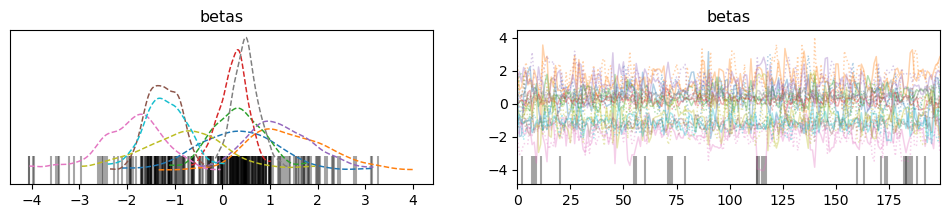

In [14]:
az.plot_trace(idata6, combined=True)